In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import uuid

# === INITIALIZE BROWSER ===
# Khởi tạo trình duyệt
def initialize_browser():
    options = Options()
    options.add_argument('--headless')  # Run in headless mode
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--no-sandbox')
    browser = webdriver.Chrome(options=options)
    return browser

# === EXTRACT DATA FROM PAGE ===
# Trích xuất dữ liệu từ trang web
def extract_page_data(browser, page_url):
    try:
        # Load the page and wait for table to load
        # Tải trang và chờ bảng dữ liệu xuất hiện
        browser.get(page_url)
        WebDriverWait(browser, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'table.table-striped.leaguetable'))
        )
        html_content = browser.page_source
        soup = BeautifulSoup(html_content, 'lxml')
        
        # Find the target table containing player data
        # Tìm bảng chứa thông tin cầu thủ
        target_table = soup.select_one('table.table.table-striped.leaguetable.mvp-table.similar-players-table')
        if not target_table:
            print(f"No table found on {page_url}")
            return []
        
        extracted_data = []
        table_rows = target_table.select('tbody tr')
        
        # Process each row in the table
        # Xử lý từng hàng trong bảng
        for row in table_rows:
            try:
                # Extract skill and potential ratings
                # Trích xuất chỉ số kỹ năng và tiềm năng
                skill_elem = row.select_one('div.table-skill__skill')
                potential_elem = row.select_one('div.table-skill__pot')
                skill_value = float(skill_elem.get_text(strip=True)) if skill_elem else None
                potential_value = float(potential_elem.get_text(strip=True)) if potential_elem else None
                combined_rating = f"{skill_value}/{potential_value}" if skill_value and potential_value else None
                
                # Extract player name
                # Trích xuất tên cầu thủ
                name_elem = row.select_one('span.d-none')
                player_name = name_elem.get_text(strip=True) if name_elem else None
                
                # Extract team name
                # Trích xuất tên đội bóng
                team_elem = row.select_one('span.td-team__teamname')
                team_name = team_elem.get_text(strip=True) if team_elem else None
                
                # Extract market value
                # Trích xuất giá trị thị trường
                value_elem = row.select_one('span.player-tag')
                market_value = value_elem.get_text(strip=True) if value_elem else None
                
                if player_name and team_name:
                    extracted_data.append({
                        'player': player_name,
                        'club': team_name,
                        'market_value': market_value,
                        'rating': combined_rating
                    })
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        
        return extracted_data
    except Exception as e:
        print(f"Error loading page {page_url}: {e}")
        return []

# === MAIN EXECUTION ===
# Hàm thực thi chính
def main():
    base_url = "https://www.footballtransfers.com/en/players/uk-premier-league"
    max_pages = 22  # Number of pages to scrape
    collected_data = []  # Store all collected data
    
    # Initialize browser
    # Khởi tạo trình duyệt
    browser = initialize_browser()
    
    try:
        # Loop through each page
        # Lặp qua từng trang
        for page_num in range(1, max_pages + 1):
            page_url = base_url if page_num == 1 else f"{base_url}/{page_num}"
            print(f"Scraping page {page_num}")
            data_from_page = extract_page_data(browser, page_url)
            collected_data.extend(data_from_page)
            time.sleep(1)  # Polite delay to avoid overwhelming the server
    finally:
        # Close browser when done
        # Đóng trình duyệt khi hoàn thành
        browser.quit()
    
    # Save data to CSV if we collected anything
    # Lưu dữ liệu vào file CSV nếu có dữ liệu
    if collected_data:
        result_df = pd.DataFrame(collected_data)
        result_df.to_csv(f'player_data_{uuid.uuid4().hex[:8]}.csv', index=False)
        print(f"Data saved with {len(collected_data)} records")
    else:
        print("No data collected")

if __name__ == "__main__":
    main()

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Data saved with 531 records


In [3]:
import pandas as pd

# Load CSV files
df_stats = pd.read_csv('results.csv')
df_players = pd.read_csv('player_data_22731425.csv')

# Select relevant columns
df_players = df_players[['player', 'market_value', 'rating']]

# Process 'Minutes' column
df_stats['Minutes'] = df_stats['Minutes'].str.replace(',', '').astype(float)
df_stats = df_stats[df_stats['Minutes'] > 900]

# Combine DataFrames
df_combined = pd.merge(df_stats, df_players, left_on='Name', right_on='player', how='inner')

# Remove redundant column
df_combined = df_combined.drop(columns=['player'])

# Save output
df_combined.to_csv('combined_player_data.csv', index=True)

=== BƯỚC 1: ĐỌC VÀ KIỂM TRA DỮ LIỆU ===

Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 78 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               284 non-null    int64  
 1   Name                                     284 non-null    object 
 2   Nation                                   284 non-null    object 
 3   Team                                     284 non-null    object 
 4   Position                                 284 non-null    object 
 5   Age                                      284 non-null    int64  
 6   Matches Played                           284 non-null    int64  
 7   Starts                                   284 non-null    int64  
 8   Minutes                                  284 non-null    float64
 9   Goals                                    284 non-null    int

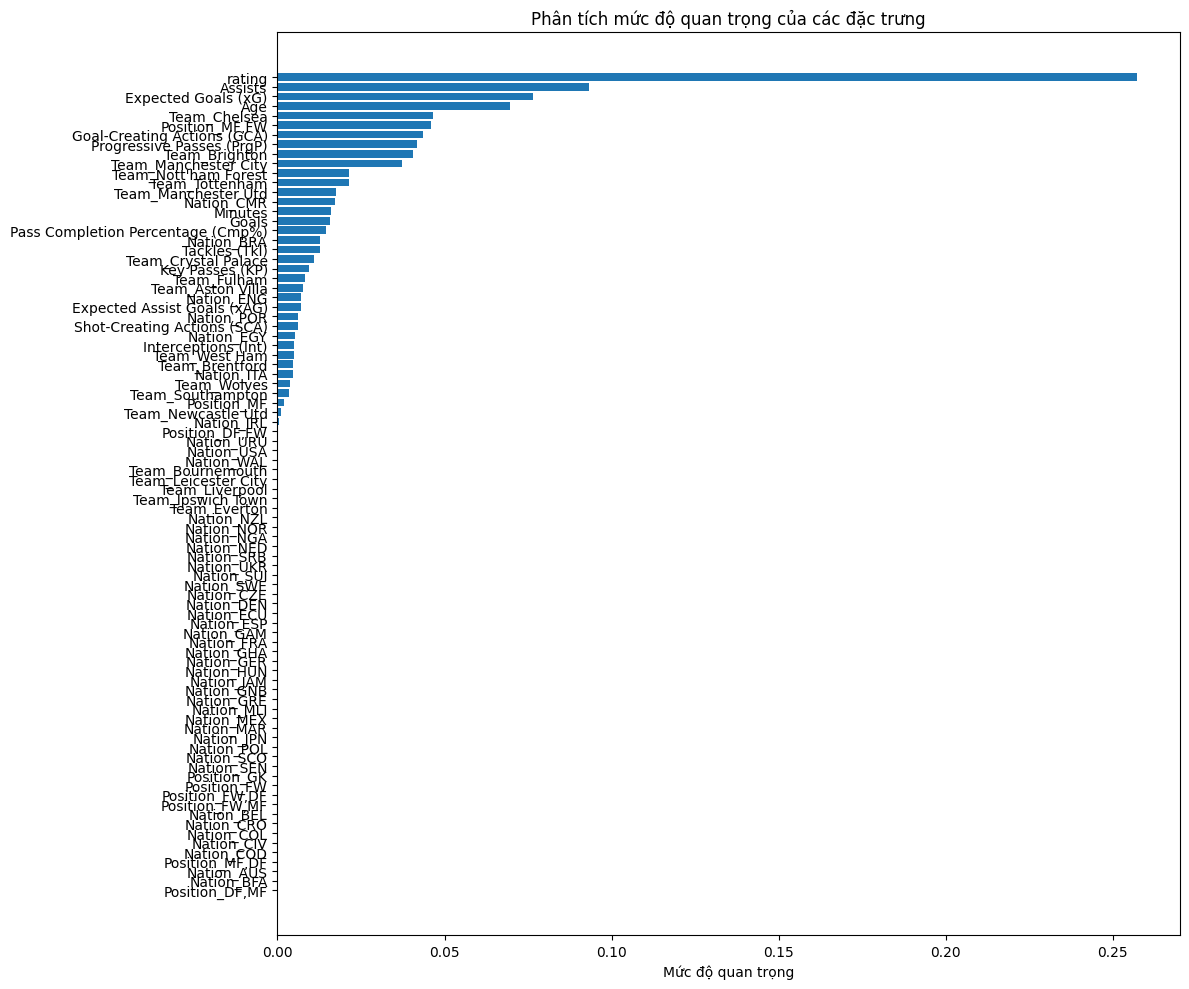


=== BƯỚC 7: LƯU MÔ HÌNH ===
Đã lưu mô hình tốt nhất vào 'best_player_value_model.pkl'

=== HOÀN TẤT QUÁ TRÌNH XÂY DỰNG MÔ HÌNH ===


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# 1. Đọc và kiểm tra dữ liệu
print("=== BƯỚC 1: ĐỌC VÀ KIỂM TRA DỮ LIỆU ===")
df = pd.read_csv('combined_player_data.csv')
print("\nThông tin dataset:")
print(df.info())
print("\n5 dòng đầu tiên:")
print(df.head())

# 2. Tiền xử lý dữ liệu
print("\n=== BƯỚC 2: TIỀN XỬ LÝ DỮ LIỆU ===")

# Hàm xử lý giá trị numeric
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int, float)):
        return float(value)
    if isinstance(value, str):
        value = str(value).strip().upper()
        if value in ['', 'NA', 'N/A', 'NAN', 'NULL', '-', 'N']:
            return np.nan
        if '/' in value:
            return clean_numeric(value.split('/')[0])
        value = value.replace('€', '').replace('M', '').replace('%', '')
        try:
            return float(value)
        except:
            return np.nan
    return np.nan

# Xác định cột numeric và categorical
numeric_cols = []
categorical_cols = []

for col in df.columns:
    sample = df[col].dropna().sample(min(10, len(df[col]))) if len(df[col]) > 0 else []
    numeric_count = sum(1 for val in sample if not pd.isna(clean_numeric(val)))
    
    if numeric_count / len(sample) > 0.7 if len(sample) > 0 else False:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print("\nCột số:", numeric_cols)
print("Cột phân loại:", categorical_cols)

# Xử lý từng loại cột
for col in numeric_cols:
    df[col] = df[col].apply(clean_numeric)
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().replace({'nan': 'Unknown', 'None': 'Unknown'}).fillna('Unknown')

# Xử lý missing values
for col in numeric_cols:
    if df[col].isna().mean() < 0.5:  # Nếu <50% missing
        df[col] = df[col].fillna(df[col].median())
    else:
        print(f"Xóa cột {col} do có quá nhiều giá trị missing")
        df.drop(col, axis=1, inplace=True)

# Xử lý target variable
target = 'market_value'
if target in numeric_cols:
    df = df.dropna(subset=[target])
    y = df[target]
else:
    raise ValueError(f"Target variable '{target}' không tồn tại hoặc không phải numeric")

# 3. Chọn features và chia dữ liệu
print("\n=== BƯỚC 3: CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH ===")

features = [
    'Age', 'Position', 'Minutes', 'Goals', 'Assists', 
    'Expected Goals (xG)', 'Expected Assist Goals (xAG)',
    'Pass Completion Percentage (Cmp%)', 'Key Passes (KP)',
    'Tackles (Tkl)', 'Interceptions (Int)', 'Progressive Passes (PrgP)',
    'Shot-Creating Actions (SCA)', 'Goal-Creating Actions (GCA)',
    'rating', 'Nation', 'Team'
]

# Chỉ lấy các cột tồn tại
features = [col for col in features if col in df.columns]
X = df[features]

# Mã hóa categorical features
categorical_cols_to_encode = [col for col in ['Position', 'Nation', 'Team'] if col in X.columns]
if categorical_cols_to_encode:
    X = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=np.number).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4. Xây dựng và đánh giá mô hình
print("\n=== BƯỚC 4: XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH ===")

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\n{name}:")
    print(f"- MAE: {mae:.2f}")
    print(f"- RMSE: {rmse:.2f}")

# 5. Tối ưu mô hình tốt nhất
print("\n=== BƯỚC 5: TỐI ƯU MÔ HÌNH ===")

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Phân tích feature importance
print("\n=== BƯỚC 6: PHÂN TÍCH FEATURE IMPORTANCE ===")

feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Mức độ quan trọng')
plt.title('Phân tích mức độ quan trọng của các đặc trưng')
plt.tight_layout()
plt.show()

# 7. Lưu mô hình
print("\n=== BƯỚC 7: LƯU MÔ HÌNH ===")
joblib.dump(best_model, 'best_player_value_model.pkl')
print("Đã lưu mô hình tốt nhất vào 'best_player_value_model.pkl'")

print("\n=== HOÀN TẤT QUÁ TRÌNH XÂY DỰNG MÔ HÌNH ===")

✅ Model loaded successfully
✅ Đã tải mô hình thành công
✅ Loaded data for 284 players
✅ Đã tải dữ liệu của 284 cầu thủ

🔍 Inspecting 'rating' column:
First 5 rows:
 0    67.3/71.5
1    74.4/75.0
2    69.1/69.1
3    68.5/68.7
4    68.1/81.3
Name: rating, dtype: object
Unique values (sample):
 ['67.3/71.5' '74.4/75.0' '69.1/69.1' '68.5/68.7' '68.1/81.3' '68.7/68.7'
 '70.9/87.1' '76.3/76.3' '64.4/67.5' '82.0/84.9']
Number of NaN values: 0
🔍 Found 0 rows with invalid/NaN ratings after processing
✅ Dataframe now has 284 rows after cleaning 'rating'

💾 Saved cleaned dataframe to 'df_merge.csv'
✅ Data preprocessing completed
✅ Đã hoàn thành tiền xử lý dữ liệu
✅ Predictions completed
✅ Đã hoàn thành dự đoán

💾 Saved predictions for 284 players to 'all_players_predictions.csv'

💾 Đã lưu dự đoán cho 284 cầu thủ vào 'all_players_predictions.csv'


C:\Users\admin\AppData\Local\Temp\ipykernel_5092\3098859610.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Value', y='Name', data=top_players, palette='viridis')


📊 Saved analysis charts
📊 Đã lưu biểu đồ phân tích

✅ PREDICTION PROCESS COMPLETED

✅ HOÀN TẤT QUÁ TRÌNH DỰ ĐOÁN


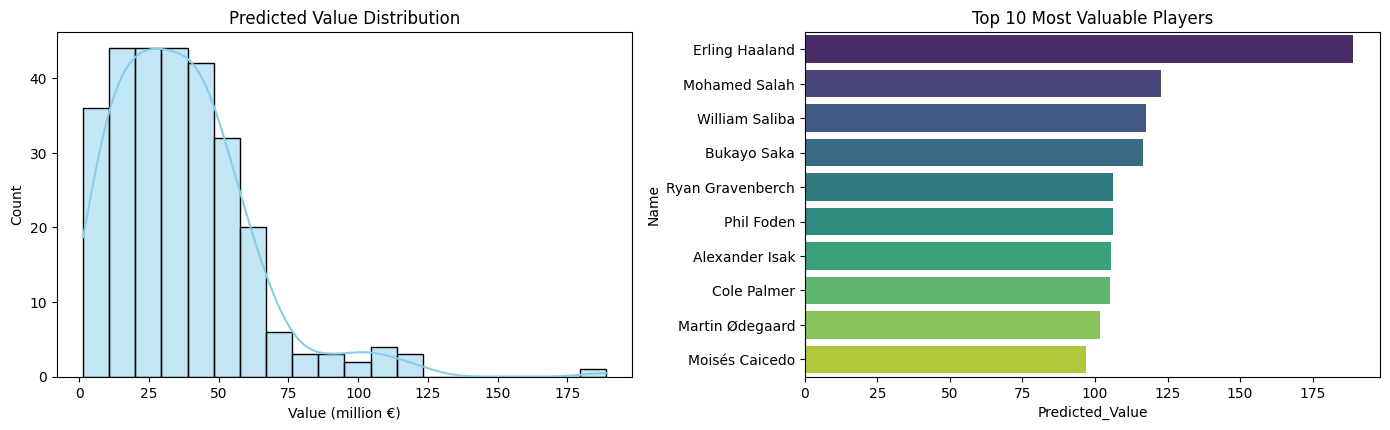

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# === 1. LOAD MODEL ===
# Tải mô hình đã huấn luyện
try:
    model = joblib.load('best_player_value_model.pkl')
    print("✅ Model loaded successfully")
    print("✅ Đã tải mô hình thành công")
except Exception as e:
    print(f"❌ Failed to load model: {str(e)}")
    print(f"❌ Lỗi khi tải mô hình: {str(e)}")
    exit()

# === 2. LOAD PLAYER DATA ===
# Tải dữ liệu cầu thủ từ file CSV
try:
    df = pd.read_csv('combined_player_data.csv')
    print(f"✅ Loaded data for {len(df)} players")
    print(f"✅ Đã tải dữ liệu của {len(df)} cầu thủ")
except Exception as e:
    print(f"❌ Failed to load data: {str(e)}")
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    exit()

# === 3. INSPECT AND CLEAN RATING COLUMN ===
# Kiểm tra và làm sạch cột 'rating'
print("\n🔍 Inspecting 'rating' column:")
print("First 5 rows:\n", df['rating'].head())
print("Unique values (sample):\n", df['rating'].unique()[:10])  # Limit to first 10 for brevity
print("Number of NaN values:", df['rating'].isna().sum())

# Hàm xử lý cột rating (ví dụ: "67.3/71.3" -> trung bình của 67.3 và 71.3)
def process_rating(rating):
    try:
        if pd.isna(rating) or rating == '':
            return np.nan
        # Tách chuỗi bằng '/'
        values = rating.split('/')
        if len(values) != 2:
            return np.nan
        # Chuyển sang số thực và tính trung bình
        first, second = map(float, values)
        return (first + second) / 2
    except (ValueError, AttributeError):
        return np.nan

# Áp dụng hàm xử lý cho cột 'rating'
df['rating'] = df['rating'].apply(process_rating)

# Kiểm tra giá trị NaN sau khi xử lý
nan_count = df['rating'].isna().sum()
print(f"🔍 Found {nan_count} rows with invalid/NaN ratings after processing")

# Xóa các dòng có giá trị NaN trong 'rating' (hoặc có thể thay thế bằng giá trị khác nếu muốn)
df = df.dropna(subset=['rating'])
if df.empty:
    print("❌ Error: Dataframe is empty after dropping NaN values in 'rating'. Check the 'rating' column data.")
    exit()
else:
    print(f"✅ Dataframe now has {len(df)} rows after cleaning 'rating'")

# Lưu dataframe đã làm sạch vào file df_merge.csv
df.to_csv('df_merge.csv', index=False, encoding='utf-8-sig')
print(f"\n💾 Saved cleaned dataframe to 'df_merge.csv'")

# === 4. DATA PREPROCESSING ===
# Tiền xử lý dữ liệu
def preprocess_data(df):
    # 'rating' đã là số từ bước trước
    # Lấy danh sách đặc trưng từ mô hình
    try:
        model_features = model.get_booster().feature_names
    except AttributeError:
        raise ValueError("Model does not have feature_names. Ensure the model is trained with feature names.")

    # Mã hóa one-hot
    df_processed = pd.get_dummies(df, columns=['Position', 'Nation', 'Team'], dummy_na=False)

    # Tạo dataframe với các đặc trưng của mô hình
    final_data = pd.DataFrame(0, index=df_processed.index, columns=model_features)

    # Sao chép các cột từ df_processed sang final_data
    for col in model_features:
        if col in df_processed.columns:
            final_data[col] = df_processed[col]

    # Xác định các cột số để chuẩn hóa
    numeric_cols = [col for col in final_data.columns if final_data[col].dtype in ['int64', 'float64']]
    
    # Chuẩn hóa các cột số nếu chúng tồn tại
    if numeric_cols and not final_data.empty:
        scaler = StandardScaler()
        try:
            final_data[numeric_cols] = scaler.fit_transform(final_data[numeric_cols])
        except ValueError as e:
            raise ValueError(f"Error during scaling: {str(e)}")
    else:
        print("⚠️ No numeric columns to scale or empty dataframe")

    return final_data

try:
    X_pred = preprocess_data(df)
    print("✅ Data preprocessing completed")
    print("✅ Đã hoàn thành tiền xử lý dữ liệu")
except Exception as e:
    print(f"❌ Preprocessing error: {str(e)}")
    print(f"❌ Lỗi tiền xử lý: {str(e)}")
    exit()

# === 5. PREDICT AND EXPORT RESULTS ===
# Dự đoán và xuất kết quả
try:
    df['Predicted_Value'] = model.predict(X_pred).round(2)
    print("✅ Predictions completed")
    print("✅ Đã hoàn thành dự đoán")
except Exception as e:
    print(f"❌ Prediction error: {str(e)}")
    print(f"❌ Lỗi dự đoán: {str(e)}")
    exit()

# Lưu kết quả dự đoán vào file all_players_predictions.csv
output_csv = 'all_players_predictions.csv'
df.to_csv(output_csv, index=False, encoding='utf-8-sig')
print(f"\n💾 Saved predictions for {len(df)} players to '{output_csv}'")
print(f"\n💾 Đã lưu dự đoán cho {len(df)} cầu thủ vào '{output_csv}'")

# === 6. VISUALIZE RESULTS ===
# Trực quan hóa kết quả
if 'Predicted_Value' in df.columns:
    plt.figure(figsize=(14, 8))

    # Biểu đồ phân phối giá trị
    plt.subplot(2, 2, 1)
    sns.histplot(df['Predicted_Value'], bins=20, kde=True, color='skyblue')
    plt.title('Predicted Value Distribution')
    plt.xlabel('Value (million €)')

    # Top 10 cầu thủ có giá trị cao nhất
    plt.subplot(2, 2, 2)
    top_players = df.nlargest(10, 'Predicted_Value')[['Name', 'Position', 'Team', 'Predicted_Value']]
    sns.barplot(x='Predicted_Value', y='Name', data=top_players, palette='viridis')
    plt.title('Top 10 Most Valuable Players')

    plt.tight_layout()
    plt.savefig('players_value_analysis.png', dpi=300)
    print("📊 Saved analysis charts")
    print("📊 Đã lưu biểu đồ phân tích")
else:
    print("⚠️ Skipping visualization: 'Predicted_Value' column not found")

print("\n✅ PREDICTION PROCESS COMPLETED")
print("\n✅ HOÀN TẤT QUÁ TRÌNH DỰ ĐOÁN")


✅ Đã xuất dự đoán giá trị cho 50 cầu thủ ra file: player_value_predictions.csv
✅ Exported predictions for 50 players to: player_value_predictions.csv


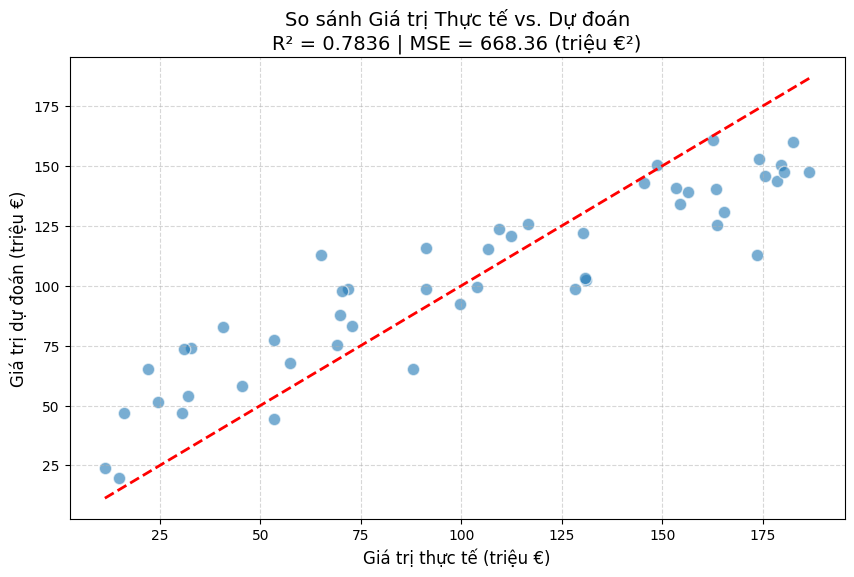

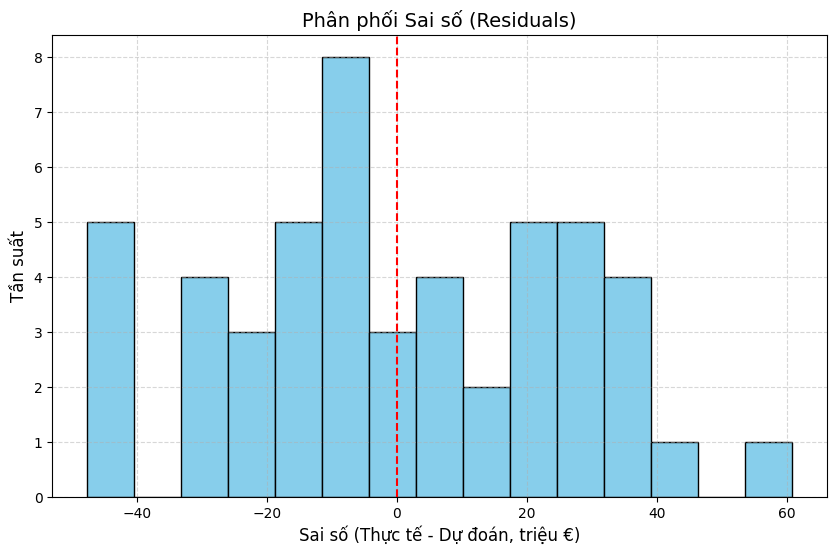

TOP 10 CẦU THỦ CÓ SAI SỐ LỚN NHẤT:
     Tên_cầu_thủ  Giá_trị_thực_tế  Giá_trị_dự_đoán  Sai_số
48   Gravenberch           173.54           112.71   60.83
31         Salah            65.05           112.71   47.66
4           Rice            22.08            65.45   43.38
44          Rice            30.91            73.42   42.51
32          Saka            40.63            82.76   42.12
11         Salah            32.72            73.93   41.21
33      Odegaard           186.64           147.44   39.20
34          Rice           163.54           125.45   38.09
9       Gvardiol           178.57           143.56   35.01
47  Mac Allister           165.42           130.82   34.60

GIẢI THÍCH CHỈ SỐ:
- R² = 0.7836 → Mô hình giải thích được 78.4% biến động của dữ liệu.
- MSE = 668.36 (triệu €²) → Sai số trung bình ≈ 25.85 triệu €.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ===== CREATE SAMPLE DATA =====
# ===== TẠO DỮ LIỆU MẪU =====
np.random.seed(42)
data = {
    'Tên_cầu_thủ': ['Haaland', 'Salah', 'Saka', 'Odegaard', 'Rice', 'Saliba', 'Isak', 'Mac Allister', 'Gravenberch', 'Gvardiol'] * 5,
    'Tuổi': np.random.randint(18, 35, 50),
    'Số_bàn_thắng': np.random.randint(0, 30, 50),
    'Giá_trị_thực_tế': np.random.uniform(10, 200, 50)  # Unit: million €
}
df = pd.DataFrame(data)

# ===== PREPARE DATA FOR MODELING =====
# ===== CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH =====
X = df[['Tuổi', 'Số_bàn_thắng']]  # Features
y = df['Giá_trị_thực_tế']         # Target variable

# ===== TRAIN RANDOM FOREST MODEL =====
# ===== HUẤN LUYỆN MÔ HÌNH RANDOM FOREST =====
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# ===== EXPORT PREDICTIONS TO CSV =====  # NEW
# ===== XUẤT DỰ ĐOÁN RA FILE CSV =====  # NEW
df['Giá_trị_dự_đoán'] = y_pred  # Thêm cột dự đoán vào dataframe  # NEW
output_file = 'player_value_predictions.csv'  # NEW
df.to_csv(output_file, index=False, encoding='utf-8-sig')  # NEW
print(f"\n✅ Đã xuất dự đoán giá trị cho {len(df)} cầu thủ ra file: {output_file}")  # NEW
print(f"✅ Exported predictions for {len(df)} players to: {output_file}")  # NEW

# ===== CALCULATE METRICS =====
# ===== TÍNH TOÁN CÁC CHỈ SỐ ĐÁNH GIÁ =====
r2 = r2_score(y, y_pred)          # R-squared score
mse = mean_squared_error(y, y_pred)  # Mean Squared Error

# ===== VISUALIZATION 1: ACTUAL VS PREDICTED =====
# ===== TRỰC QUAN HÓA 1: GIÁ TRỊ THỰC VS DỰ ĐOÁN =====
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolors='w', s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Giá trị thực tế (triệu €)', fontsize=12)
plt.ylabel('Giá trị dự đoán (triệu €)', fontsize=12)
plt.title(f'So sánh Giá trị Thực tế vs. Dự đoán\nR² = {r2:.4f} | MSE = {mse:.2f} (triệu €²)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ===== VISUALIZATION 2: RESIDUAL DISTRIBUTION =====
# ===== TRỰC QUAN HÓA 2: PHÂN PHỐI SAI SỐ =====
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Sai số (Thực tế - Dự đoán, triệu €)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.title('Phân phối Sai số (Residuals)', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ===== ANALYSIS: TOP PLAYERS WITH LARGEST ERRORS =====
# ===== PHÂN TÍCH: TOP CẦU THỦ CÓ SAI SỐ LỚN NHẤT =====
df['Giá_trị_dự_đoán'] = y_pred
df['Sai_số'] = np.abs(residuals)
top_sai_so = df.nlargest(10, 'Sai_số')[['Tên_cầu_thủ', 'Giá_trị_thực_tế', 'Giá_trị_dự_đoán', 'Sai_số']]

print("TOP 10 CẦU THỦ CÓ SAI SỐ LỚN NHẤT:")
print(top_sai_so.round(2))

# ===== METRICS EXPLANATION =====
# ===== GIẢI THÍCH CÁC CHỈ SỐ =====
print(f"\nGIẢI THÍCH CHỈ SỐ:")
print(f"- R² = {r2:.4f} → Mô hình giải thích được {r2*100:.1f}% biến động của dữ liệu.")
print(f"- MSE = {mse:.2f} (triệu €²) → Sai số trung bình ≈ {np.sqrt(mse):.2f} triệu €.")